In [1]:
import galsim
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
from montara.des_piff import DES_Piff

In [3]:
pmod = DES_Piff('/Users/Matt/DESDATA/y3_piff/y3a1-v29/239273/D00239273_i_c21_r2362p01_piff.fits')

In [103]:
pos = galsim.PositionD(x=17.6, y=20.8)
psf = pmod.getPSF(pos, galsim.PixelScale(0.263))
obs = pmod.getNGmixObs(pos, galsim.PixelScale(0.263))

In [129]:
im = galsim.Convolve([
    galsim.Deconvolve(galsim.Pixel(0.263)), 
    psf]).drawImage(nx=33, ny=33, scale=0.263, method='no_pixel').array
im /= np.sum(im)

In [105]:
obs.image = im

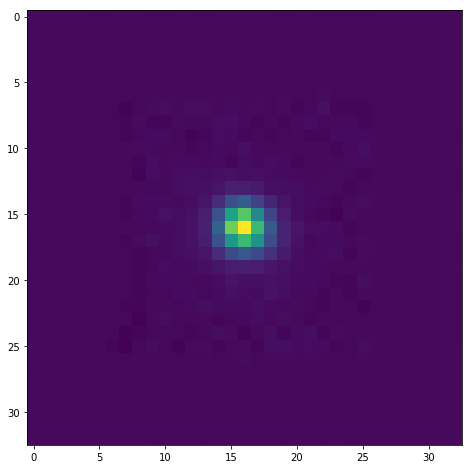

In [106]:
plt.figure(figsize=(8, 8))
plt.imshow(im)

In [128]:
import ngmix
from ngmix.bootstrap import EMRunner

ngauss = 2    # number of gaussians to fit
Tguess = 4.0  # Ixx+Iyy in units defined by the wcs
ntry   = 5    # how many times to try with different random
              # guesses based on Tguess

em_pars={'maxiter':1000, 'tol':1.0e-6}

runner=EMRunner(obs, Tguess, ngauss, em_pars)

runner.go(ntry=ntry)

fitter=runner.get_fitter()
res=fitter.get_result()
print("""
flags:   %(flags)d
numiter: %(numiter)d
fdiff:   %(fdiff)g
""" % res)

if res['flags'] != 0:
    print('an error occured with flags:',res['flags'])
else:

    # get a ngmix.GMix object
    gmix=runner.get_fitter().get_gmix()

    # get the full parametrization as an array.  Note EM does
    # not normalize the p values to give the total
    # flux
    #
    # [ p1, row1, col1, irr1, irc1, icc1,
    #   p2, row2, col2, irr2, irc2, icc2,
    #   p3, row3, col3, irr3, irc3, icc3 ]

    pars=gmix.get_full_pars()
    print(pars)


flags:   0
numiter: 602
fdiff:   9.98703e-07

[ 0.22270385 -0.00731392 -0.01670942  0.09772741  0.0039566   0.10457784
  0.06684082  0.10612219 -0.00416981  0.5085817   0.07913173  0.50619493]


In [108]:
gm = runner.fitter.get_gmix()

In [109]:
gm_gs = gm.make_galsim_object()

In [110]:
gm_gs

galsim.Sum([galsim.Transformation(galsim.Gaussian(sigma=0.31783196418472376, flux=0.222703839673744, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), jac=[[1.0172831383013683, 0.0195772298911706], [0.0195772298911706, 0.983387250083221]], offset=galsim.PositionD(x=-0.016709424989104132, y=-0.0073139236041476225), flux_ratio=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), propagate_gsparams=True), galsim.Transformation(galsim.Gaussian(sigma=0.7079394023598625, flux=0.06684082542702247, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)), jac=[[1.0019060374053448, 0.07870225907977058], [0.07870225907977058, 1.0042798506235366]], offset=galsim.PositionD(x=-0.004169805264636683, y=0.10612217851542213), flux_ratio=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05), propagate_gsparams=True)], gspa

In [113]:
im_gs = gm_gs.drawImage(nx=33, ny=33, scale=0.263, method='no_pixel').array
im_gs /= np.sum(im_gs)

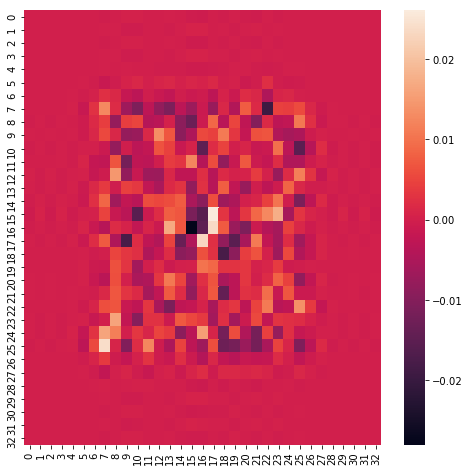

In [114]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap((im_gs - im) / np.max(im))

<ErrorbarContainer object of 3 artists>

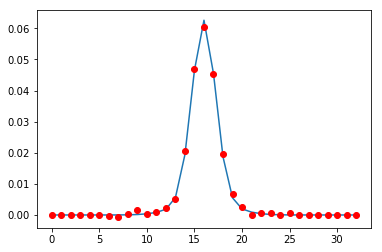

In [127]:
row = 17
plt.figure()
plt.plot(np.arange(33), im_gs[row, :])
plt.plot(np.arange(33), im[row, :], 'o', color='r')
plt.errorbar(np.arange(33), im[row, :], yerr=1.0 / np.sqrt(obs.weight[row, :]), color='r', fmt='.')

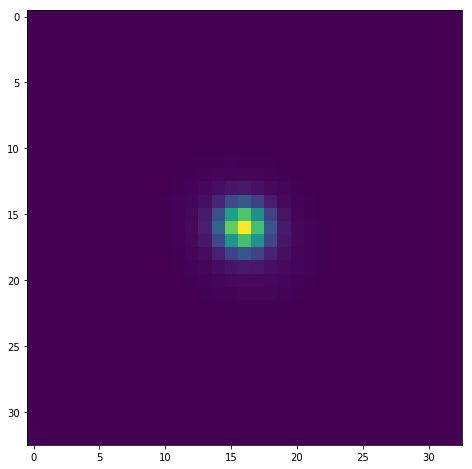

In [131]:
plt.figure(figsize=(8, 8))
plt.imshow(np.arcsinh(im_gs))